# Imports

In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

pd.options.display.max_columns = 999

import warnings

warnings.filterwarnings('ignore')

Retirar number of reviews = 0

## Load Data

In [2]:
path = '/home/edilson07/projects/hackday_6/datasets/'

df_raw = pd.read_json(path + 'train.json', orient='split')

## Criar numero de caracteristicas

In [3]:
df_raw['product_details_count'] = df_raw['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

## Transformar detalhes dos produtos em colunas

In [4]:
df_raw['product_details'] = df_raw['product_details'].apply(lambda x: ast.literal_eval(x))

In [5]:
all_keys = set()
for data in df_raw['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    df_raw[key] = df_raw['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
df_raw.drop('product_details', axis=1, inplace=True)

In [6]:
df_raw.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)

# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
df_raw['Pack Of'].fillna(df_raw['Pack Of 2'], inplace=True)

df_raw.drop('Pack Of 2', axis=1, inplace=True)

## Escolher as colunas com menos NaN

In [7]:
details_to_maintain = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       'actual_price',
                       'Sleeve',
                       'Pack Of',
                       'Brand Color',
                       'Size',
                       'Fit',
                       'Pattern',
                       'Ideal For',
                       'Suitable For',
                       'Fabric',
                       'Type',
                       'product_details_count',]
                       #'Shade',
                       #'Pack Of 2']

df_raw = df_raw[details_to_maintain]

# Data Description

In [8]:
df1 = df_raw.copy()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23309 entries, 0 to 23308
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     23309 non-null  object        
 1   average_rating          23309 non-null  float64       
 2   number_of_reviews       23309 non-null  int64         
 3   brand                   23309 non-null  object        
 4   category                23309 non-null  object        
 5   crawled_at              23309 non-null  datetime64[ns]
 6   description             23309 non-null  object        
 7   images                  23309 non-null  object        
 8   out_of_stock            23309 non-null  bool          
 9   avg_delivery_time_days  23309 non-null  int64         
 10  pid                     23309 non-null  object        
 11  seller                  23309 non-null  object        
 12  sub_category            23309 non-null  object     

In [10]:
df1.describe()

,average_rating,number_of_reviews,crawled_at,avg_delivery_time_days,fabrication_time,actual_price,product_details_count
count,23309.000000,23309.000000,23309,23309.000000,23309.000000,19813.000000,23309.000000
mean,3.367322,27.767386,2021-02-10 22:55:49.561242624,9.933502,366.663563,1480.980568,13.438500
min,0.000000,0.000000,2021-02-10 20:11:51,3.000000,1.000000,150.000000,1.000000
25%,3.100000,26.000000,2021-02-10 21:30:50,7.000000,184.000000,895.000000,11.000000
50%,3.700000,31.000000,2021-02-10 23:01:37,10.000000,369.000000,1256.000000,14.000000
75%,4.100000,34.000000,2021-02-11 00:17:54,13.000000,550.000000,1799.000000,17.000000
max,5.000000,41.000000,2021-02-11 01:31:55,19.000000,729.000000,12999.000000,25.000000
std,1.157570,9.555809,NaN,3.568971,210.255811,967.824650,4.517272


## Criar colunas Numero de Imagens

In [11]:
df1['images'] = df1['images'].apply(lambda x: ast.literal_eval(x))

In [12]:
df1['number_images'] = df1['images'].apply(lambda x: len(x))

## Dropar colunas complicadas/descessarias

In [13]:
cols_drop = ['_id','crawled_at','description','title','images']

In [14]:
df1 = df1.drop(cols_drop, axis=1)

In [15]:
df1 = df1.dropna(subset='actual_price')

In [16]:
df1 = df1.fillna(0)

In [17]:
df1.isna().sum()

average_rating            0
number_of_reviews         0
brand                     0
category                  0
out_of_stock              0
avg_delivery_time_days    0
pid                       0
seller                    0
sub_category              0
fabrication_time          0
actual_price              0
Sleeve                    0
Pack Of                   0
Brand Color               0
Size                      0
Fit                       0
Pattern                   0
Ideal For                 0
Suitable For              0
Fabric                    0
Type                      0
product_details_count     0
number_images             0
dtype: int64

## Encoders

In [18]:
df1.nunique()

average_rating               38
number_of_reviews            32
brand                       301
category                      3
out_of_stock                  2
avg_delivery_time_days       17
pid                       18718
seller                      460
sub_category                 23
fabrication_time            729
actual_price                636
Sleeve                       20
Pack Of                      14
Brand Color                1611
Size                         15
Fit                          44
Pattern                     107
Ideal For                     6
Suitable For                  5
Fabric                      198
Type                        143
product_details_count        25
number_images                22
dtype: int64

In [19]:
df1.columns

Index(['average_rating', 'number_of_reviews', 'brand', 'category',
       'out_of_stock', 'avg_delivery_time_days', 'pid', 'seller',
       'sub_category', 'fabrication_time', 'actual_price', 'Sleeve', 'Pack Of',
       'Brand Color', 'Size', 'Fit', 'Pattern', 'Ideal For', 'Suitable For',
       'Fabric', 'Type', 'product_details_count', 'number_images'],
      dtype='object')

In [20]:
df1.dtypes

average_rating            float64
number_of_reviews           int64
brand                      object
category                   object
out_of_stock                 bool
avg_delivery_time_days      int64
pid                        object
seller                     object
sub_category               object
fabrication_time            int64
actual_price              float64
Sleeve                     object
Pack Of                    object
Brand Color                object
Size                       object
Fit                        object
Pattern                    object
Ideal For                  object
Suitable For               object
Fabric                     object
Type                       object
product_details_count       int64
number_images               int64
dtype: object

In [21]:
#ONE HOT ENCODER
onehot = ['category','out_of_stock']
df1 = pd.get_dummies(df1, columns=onehot)

In [22]:


#TARGET ENCODER
te_cols = ['brand','seller','sub_category','Sleeve', 'Pack Of',
       'Brand Color', 'Size', 'Fit', 'Pattern', 'Ideal For', 'Suitable For',
       'Fabric', 'Type']


df1[te_cols] = df1[te_cols].astype(str)

te = TargetEncoder(target_type='continuous')
df1[te_cols] = te.fit_transform(df1[te_cols], df1['actual_price'])



## Dropar ID E variável resposta

In [111]:
X = df1.drop(['pid','actual_price'], axis=1).copy()
y = df1['actual_price'].copy()

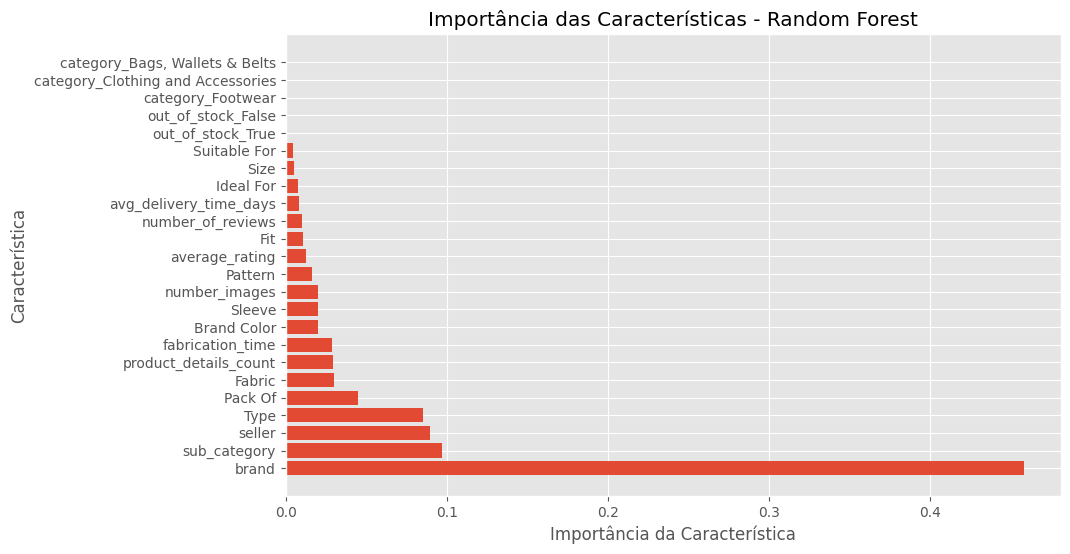

In [112]:
from sklearn.ensemble import RandomForestRegressor

# Crie o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1) 

# Treine o modelo
rf.fit(X, y)

# Obtenha a importância das características
feature_importance = rf.feature_importances_

# Crie um DataFrame para facilitar a visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Classifique as características com base na importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância da Característica')
plt.ylabel('Característica')
plt.title('Importância das Características - Random Forest')
plt.show()

# Machine Learning

In [113]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
X_train.shape, X_val.shape

((15850, 24), (3963, 24))

In [115]:
# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)


## XGBoost

In [28]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred_val = xgb.predict(X_val)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

def smape(y_pred, y_test):

    smape = 100 / len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
    return smape

In [31]:
print(f'MAE: {mean_absolute_error(y_pred_val, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_val, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_val, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_val, y_val)}')


MAE: 228.37279318559962
MAPE: 0.1475981181543136
RMSE: 435.428790091591
SMAPE: 14.759596644913918


## Catboost

In [32]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=False)

cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_val)

In [33]:
print(f'MAE: {mean_absolute_error(y_pred_cat, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_cat, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_cat, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_cat, y_val)}')

MAE: 236.4899507461888
MAPE: 0.15622223032512214
RMSE: 413.874108935019
SMAPE: 15.74831294488091


In [34]:
X_train.dtypes

average_rating                       float64
number_of_reviews                      int64
brand                                float64
avg_delivery_time_days                 int64
seller                               float64
sub_category                         float64
fabrication_time                       int64
Sleeve                               float64
Pack Of                              float64
Brand Color                          float64
Size                                 float64
Fit                                  float64
Pattern                              float64
Ideal For                            float64
Suitable For                         float64
Fabric                               float64
Type                                 float64
product_details_count                  int64
number_images                          int64
category_Bags, Wallets & Belts          bool
category_Clothing and Accessories       bool
category_Footwear                       bool
out_of_sto

In [139]:
import inflection

X_train.columns = X_train.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X_val.columns = X_val.columns.map(lambda x: inflection.parameterize(x, separator='_'))
X.columns = X.columns.map(lambda x: inflection.parameterize(x, separator='_'))

In [36]:
X_train.dtypes

average_rating                       float64
number_of_reviews                      int64
brand                                float64
avg_delivery_time_days                 int64
seller                               float64
sub_category                         float64
fabrication_time                       int64
sleeve                               float64
pack_of                              float64
brand_color                          float64
size                                 float64
fit                                  float64
pattern                              float64
ideal_for                            float64
suitable_for                         float64
fabric                               float64
type                                 float64
product_details_count                  int64
number_images                          int64
category_bags_wallets_belts             bool
category_clothing_and_accessories       bool
category_footwear                       bool
out_of_sto

## LightGBM

In [37]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(X_train, y_train)

y_pred_lgb = lgb.predict(X_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1982
[LightGBM] [Info] Number of data points in the train set: 15850, number of used features: 23
[LightGBM] [Info] Start training from score 1475.283722


In [38]:
print(f'MAE: {mean_absolute_error(y_pred_lgb, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_lgb, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_lgb, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_lgb, y_val)}')

MAE: 244.69682035621267
MAPE: 0.16225639854822227
RMSE: 426.60651245218617
SMAPE: 16.34037084253946


## Random Forest

In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

In [141]:
print(f'MAE: {mean_absolute_error(y_pred_rf, y_val)}')
print(f'MAPE: {mean_absolute_percentage_error(y_pred_rf, y_val)}')
print(f'RMSE: {mean_squared_error(y_pred_rf, y_val, squared=False)}')
print(f'SMAPE: {smape(y_pred_rf, y_val)}')

MAE: 187.906826898814
MAPE: 0.11430953117124092
RMSE: 408.67300210578844
SMAPE: 11.476415469286373


In [118]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
X_train

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Sleeve,Pack Of,Brand Color,Size,Fit,Pattern,Ideal For,Suitable For,Fabric,Type,product_details_count,number_images,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
21651,3.7,31,1117.921028,10,958.473703,2536.332007,487,1487.483433,1458.203630,1709.306289,1711.481488,1618.465506,1626.712066,1628.458355,1320.149935,1500.661285,1689.752954,6,4,False,True,False,True,False
20460,4.2,35,2688.747174,13,2366.384397,1297.629320,456,1173.873680,1431.697045,883.147871,1181.609671,1296.860070,1275.565616,1383.898351,1549.183185,1368.340557,1131.836403,18,6,False,True,False,True,False
11783,4.5,37,994.784365,15,994.765589,954.127172,163,1484.533563,1466.876071,1710.351795,1712.744425,1618.451191,1588.341060,1630.999146,1318.437388,1077.067714,1694.581381,5,0,False,True,False,True,False
5488,4.0,33,2419.445643,12,2433.351723,1992.348912,541,1484.533563,1466.876071,1710.351795,1712.744425,1618.451191,1588.341060,1630.999146,1318.437388,2278.849494,1940.080374,6,6,False,True,False,True,False
19484,4.1,34,1502.877623,13,1502.877623,1296.724832,387,1175.220231,1427.855411,1712.967593,1715.010047,999.000000,1486.702007,1629.711641,1547.554396,1484.430353,1694.869493,15,4,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13278,3.4,28,1617.869230,9,1617.869230,1302.903611,263,1267.960060,1618.095233,1377.120232,1162.423519,1308.869578,1587.541872,1388.399620,1557.084778,1498.137999,1139.188058,20,5,False,True,False,True,False
14078,3.9,32,1199.000000,11,1199.000000,1297.629320,401,1173.873680,1431.697045,976.990845,1230.381847,1296.860070,1275.565616,1383.898351,1549.183185,1368.340557,1131.836403,18,2,False,True,False,True,False
6357,3.2,26,1237.137730,8,1240.664364,1302.903611,637,1267.960060,1431.477104,1134.819419,1177.608424,1415.218642,1290.807402,1388.399620,1557.084778,1498.137999,1139.188058,17,6,False,True,False,True,False
1003,3.4,28,992.383159,9,858.240866,1300.285269,315,1169.419281,1439.663142,1537.925306,1131.619142,1307.592591,1636.641186,1394.748519,1560.163921,1385.270677,1133.353843,18,4,False,True,False,True,False


## Fine Tuning Optuna

In [42]:
import optuna

In [57]:
def objective(trial):
    # Defina os parâmetros que você deseja otimizar
    n_estimators = trial.suggest_int('n_estimators', 500, 1000, 100)
    max_depth = trial.suggest_int('max_depth', 60, 120)
    #min_samples_split = trial.suggest_float('min_samples_split', 2,3)
   # min_samples_leaf = trial.suggest_float('min_samples_leaf', 1, 2)
    max_features = trial.suggest_int('max_features', 15, 45)

    # Crie o modelo Random Forest com os parâmetros otimizados
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=max_features,
        bootstrap=True,  # Mantenha os outros parâmetros inalterados
        ccp_alpha=0.0,
        criterion='squared_error',
        max_leaf_nodes=None,
        max_samples=None,
        min_impurity_decrease=0.0,
        min_weight_fraction_leaf=0.0,
        n_jobs=-1,
        oob_score=False,
        random_state=None,
        verbose=0,
        warm_start=False
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    smape_error = smape(y_pred, y_val)
    
    return smape_error

In [58]:
study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

[I 2023-10-21 16:52:01,086] A new study created in memory with name: no-name-b991d37a-9929-44a1-baca-472fc2d1ee1c
[I 2023-10-21 16:52:09,986] Trial 0 finished with value: 11.321444200087477 and parameters: {'n_estimators': 600, 'max_depth': 87, 'max_features': 18}. Best is trial 0 with value: 11.321444200087477.
[I 2023-10-21 16:52:21,380] Trial 1 finished with value: 11.311211658434589 and parameters: {'n_estimators': 600, 'max_depth': 68, 'max_features': 25}. Best is trial 1 with value: 11.311211658434589.
[I 2023-10-21 16:52:28,408] Trial 2 finished with value: 11.358593197504522 and parameters: {'n_estimators': 500, 'max_depth': 111, 'max_features': 16}. Best is trial 1 with value: 11.311211658434589.
[I 2023-10-21 16:52:42,235] Trial 3 finished with value: 11.316928503046725 and parameters: {'n_estimators': 700, 'max_depth': 104, 'max_features': 36}. Best is trial 1 with value: 11.311211658434589.
[I 2023-10-21 16:52:56,946] Trial 4 finished with value: 11.33763117885309 and param

KeyboardInterrupt: 

In [59]:
best_params = study.best_params
best_params

{'n_estimators': 900, 'max_depth': 66, 'max_features': 43}

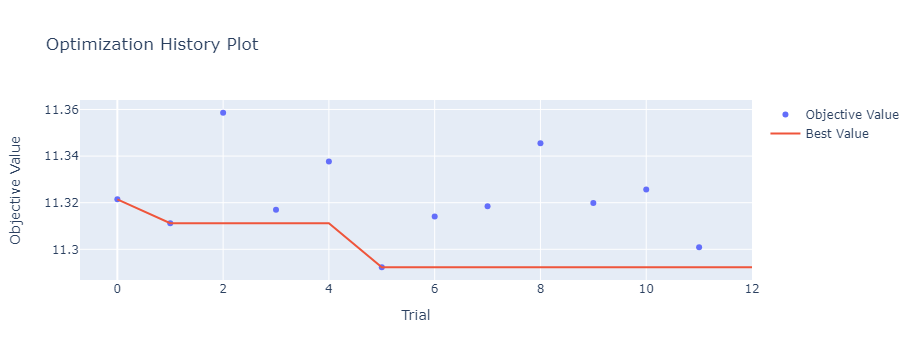

In [60]:
optuna.visualization.plot_optimization_history(study)
#fig.write_image("fig.png")
#fig.update_layout(template='plotly_dark', title='<b>Optimization History Plot', title_x=0.5)
#fig.show()

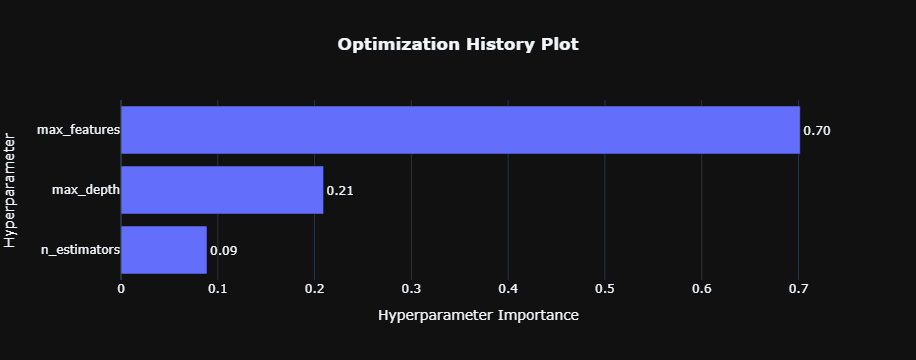

In [61]:
fig = optuna.visualization.plot_param_importances(study)
fig.update_layout(template='plotly_dark', title='<b>Optimization History Plot', title_x=0.5)

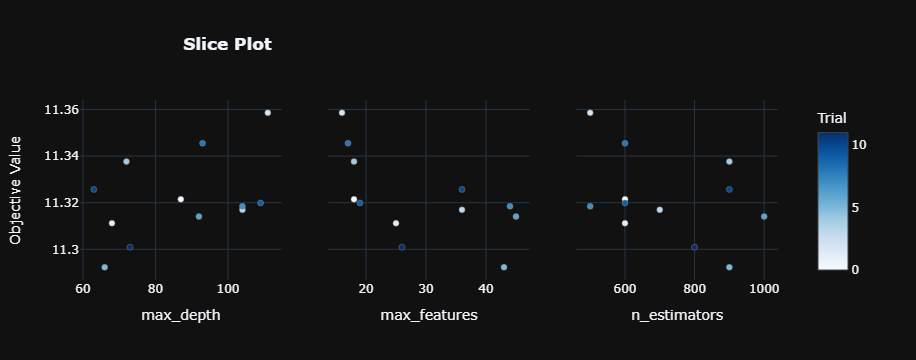

In [62]:
fig = optuna.visualization.plot_slice(study)
fig.update_layout(template='plotly_dark', title='<b>Slice Plot', title_x=0.2)

In [65]:
best_model = RandomForestRegressor(
n_estimators=900,
max_depth=66,
max_features=43,
min_samples_split=2,
min_samples_leaf=1,
bootstrap=True,  # Mantenha os outros parâmetros inalterados
ccp_alpha=0.0,
criterion='squared_error',
max_leaf_nodes=None,
max_samples=None,
min_impurity_decrease=0.0,
min_weight_fraction_leaf=0.0,
n_jobs=-1,
oob_score=False,
random_state=None,
verbose=0,
warm_start=False
)

In [88]:
rf.fit(X, y)

RandomForestRegressor(n_jobs=-1)

In [163]:
best_model.fit(X, y)

RandomForestRegressor(max_depth=66, max_features=43, n_estimators=900,
                      n_jobs=-1)

In [164]:
X

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,sleeve,pack_of,brand_color,size,fit,pattern,ideal_for,suitable_for,fabric,type,product_details_count,number_images,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
0,3.2,26,1060.503599,8,1060.503599,863.486546,653,1485.779916,1427.855411,1712.967593,1715.010047,1624.843023,1278.800554,1629.711641,1326.090835,1360.456363,1694.869493,6,5,False,True,False,True,False
1,4.0,33,711.378809,12,706.917447,1296.724832,668,1255.066104,1427.855411,1101.109437,1213.153051,1301.680988,1278.800554,1384.842808,1547.554396,1484.430353,1130.332763,16,2,False,True,False,True,False
2,3.9,32,1096.234907,11,1067.085770,2516.372152,53,1974.974990,1464.689266,1712.967593,1715.010047,1624.843023,1279.264182,1629.711641,1547.554396,1232.427563,1694.869493,13,5,False,True,False,True,False
3,3.8,31,1053.276528,11,1053.830368,1300.285269,510,1266.172725,1629.647741,2214.490224,1200.432591,1307.592591,1636.641186,1394.748519,1560.163921,1504.419550,1333.459626,18,5,False,True,False,True,False
4,2.4,20,836.694971,5,659.477365,1297.751489,496,1261.472679,1425.126569,990.294207,1156.249561,1301.747950,1280.442163,1383.028204,1548.552601,1495.491345,1131.172133,15,5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23303,2.5,21,1286.475590,5,1277.605396,1302.903611,552,1977.375580,1431.477104,499.000000,1226.288002,1415.218642,1629.460160,1388.399620,1557.084778,1498.137999,1139.188058,17,5,False,True,False,True,False
23304,4.1,34,1156.906763,13,546.071232,2519.829211,501,1975.161187,1474.944402,1715.771697,1717.005095,1626.480578,1296.660703,1383.028204,1330.556886,1495.491345,830.797696,11,4,False,True,False,True,False
23306,0.0,0,1770.439769,4,1770.439769,1724.988029,687,1485.779916,1464.689266,1712.967593,1715.010047,1624.843023,1627.888456,1629.711641,1326.090835,1498.888672,1729.785132,15,5,False,True,False,True,False
23307,0.0,0,900.383501,4,900.383501,1296.724832,647,1255.066104,1427.855411,993.141204,1208.700886,1301.680988,1278.800554,1384.842808,1547.554396,1360.456363,1130.332763,17,6,False,True,False,True,False


## Previsao No test(fazer as mesmas transformações do treino)

In [167]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [168]:
X_test['product_details_count'] = X_test['product_details'].apply(lambda x: len(ast.literal_eval(x)) )

In [169]:
X_test['product_details'] = X_test['product_details'].apply(lambda x: ast.literal_eval(x))

In [170]:
all_keys = set()
for data in X_test['product_details']:
    for item in data:
        all_keys.update(item.keys())

# Para cada chave no conjunto, crie uma coluna no DataFrame e preencha com os valores correspondentes
for key in all_keys:
    X_test[key] = X_test['product_details'].apply(lambda x: next((item[key] for item in x if key in item), np.nan))

# Remova a coluna 'product_details' original
X_test.drop('product_details', axis=1, inplace=True)

In [171]:
X_test.rename(columns={'Pack of': 'Pack Of 2'}, inplace=True)
# Preencha os valores NaN na coluna 'Pack Of' com os valores da coluna 'Pack Of' 2
X_test['Pack Of'].fillna(X_test['Pack Of 2'], inplace=True)

# Agora você pode descartar a coluna 'Pack Of 2' se desejar
X_test.drop('Pack Of 2', axis=1, inplace=True)

In [172]:
X_test['images'] = X_test['images'].apply(lambda x: ast.literal_eval(x))

In [173]:
X_test['number_images'] = X_test['images'].apply(lambda x: len(x))

In [174]:
details_to_maintain_test = ['_id',
                       'average_rating',
                       'number_of_reviews',
                       'brand',
                       'category',
                       'crawled_at',
                       'description',
                       'images',
                       'out_of_stock',
                       'avg_delivery_time_days',
                       'pid',
                       'seller',
                       'sub_category',
                       'fabrication_time',
                       'title',
                       #'actual_price',
                       'Sleeve',
                       'Pack Of',
                       'Brand Color',
                       'Size',
                       'Fit',
                       'Pattern',
                       'Ideal For',
                       'Suitable For',
                       'Fabric',
                       'Type',
                       'product_details_count',
                       'number_images',
                       #'Shade',
                           ]

In [175]:
X_test = X_test[details_to_maintain_test]

In [176]:
X_test.head()

,_id,average_rating,number_of_reviews,brand,category,crawled_at,description,images,out_of_stock,avg_delivery_time_days,pid,seller,sub_category,fabrication_time,title,Sleeve,Pack Of,Brand Color,Size,Fit,Pattern,Ideal For,Suitable For,Fabric,Type,product_details_count,number_images
0,35d28961-170f-515d-90d4-55ee978a8afa,4.8,40,Mo,Clothing and Accessories,2021-02-10 21:18:47,Accentuate your formal wardrobe by buying this...,[https://rukminim1.flixcart.com/image/128/128/...,False,17,SHTFDYZGEXPED7YS,KKSONS,Topwear,32,Men Slim Fit Printed Button Down Collar Casual...,Full Sleeve,1,NaN,NaN,Slim,Printed,NaN,Western Wear,Cotton Blend,NaN,14,4
1,5089618f-7eec-571b-84b6-41c3b43a2ed4,3.7,31,True Bl,Clothing and Accessories,2021-02-10 22:12:20,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,TROFM47EVWRYK7ZU,KAPSONSRETAILPVTLTD,Bottomwear,318,Slim Fit Men Brown Cotton Blend Trousers,NaN,1,NaN,NaN,Slim Fit,Solid,NaN,Western Wear,Cotton Blend,Casual Trousers,14,5
2,84716375-2ea3-5376-bca1-ecef76b0aa87,3.2,26,vims rai,Clothing and Accessories,2021-02-11 01:16:36,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,8,FABFZAMPGDW3BKGX,WHITE SKY,Fabrics,411,Rayon Printed Shirt Fabric (Unstitched),NaN,NaN,NaN,NaN,NaN,Printed,Men,NaN,Rayon,Shirt Fabric,15,4
3,84120873-2b67-5f2c-9074-803e52e278f7,3.6,30,True Bl,Clothing and Accessories,2021-02-10 22:21:32,undefined,[https://rukminim1.flixcart.com/image/128/128/...,False,10,BZRFNMGPNBQTYHMG,KAPSONSRETAILPVTLTD,"Blazers, Waistcoats and Suits",431,Solid Single Breasted Formal Men Full Sleeve B...,Full Sleeve,1,NaN,NaN,NaN,Solid,NaN,NaN,Polyester,Single Breasted,11,5
4,96238f84-3bb8-5ec1-b2f4-fe481ba35faa,2.5,21,ECKO Unl,Clothing and Accessories,2021-02-10 22:32:00,ECKO Unltd YD CHECK Cotton Woven Slim Fit IND...,[https://rukminim1.flixcart.com/image/128/128/...,False,5,SHTFV5G6PZDQZEVZ,SandSMarketing,Topwear,512,Men Slim Fit Checkered Cut Away Collar Casual ...,Full Sleeve,1,NaN,NaN,Slim,Checkered,NaN,Western Wear,Cotton Blend,NaN,13,5


In [177]:
X_test = pd.get_dummies(X_test, columns=onehot)
X_test[te_cols] = te.transform(X_test[te_cols])

In [178]:
X_test = X_test.drop(cols_drop, axis=1)
X_test = X_test.drop('pid', axis=1)

In [179]:
X_test.head()

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,Sleeve,Pack Of,Brand Color,Size,Fit,Pattern,Ideal For,Suitable For,Fabric,Type,product_details_count,number_images,"category_Bags, Wallets & Belts",category_Clothing and Accessories,category_Footwear,out_of_stock_False,out_of_stock_True
0,4.8,40,1444.867614,17,1484.968130,1299.049885,32,1976.394231,1431.158920,1480.980568,1480.980568,1411.139804,1283.628944,1480.980568,1552.498280,1496.650804,1480.980568,14,4,False,True,False,True,False
1,3.7,31,2625.158350,10,2845.184491,1996.485795,318,1480.980568,1431.158920,1480.980568,1480.980568,2160.091736,1629.287467,1480.980568,1552.498280,1496.650804,2270.457512,14,5,False,True,False,True,False
2,3.2,26,1203.601184,8,1219.220717,1197.636572,411,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1283.628944,1386.974560,1480.980568,1256.351490,1206.847489,15,4,False,True,False,True,False
3,3.6,30,2625.158350,10,2845.184491,4129.189314,431,1976.394231,1431.158920,1480.980568,1480.980568,1480.980568,1629.287467,1480.980568,1480.980568,2263.556790,5657.115926,11,5,False,True,False,True,False
4,2.5,21,1281.544466,5,1271.418787,1299.049885,512,1976.394231,1431.158920,1480.980568,1480.980568,1411.139804,1483.169153,1480.980568,1552.498280,1496.650804,1480.980568,13,5,False,True,False,True,False


In [180]:
X_test.columns = X_test.columns.map(lambda x: inflection.parameterize(x, separator='_'))

In [181]:
X_test

,average_rating,number_of_reviews,brand,avg_delivery_time_days,seller,sub_category,fabrication_time,sleeve,pack_of,brand_color,size,fit,pattern,ideal_for,suitable_for,fabric,type,product_details_count,number_images,category_bags_wallets_belts,category_clothing_and_accessories,category_footwear,out_of_stock_false,out_of_stock_true
0,4.8,40,1444.867614,17,1484.968130,1299.049885,32,1976.394231,1431.158920,1480.980568,1480.980568,1411.139804,1283.628944,1480.980568,1552.498280,1496.650804,1480.980568,14,4,False,True,False,True,False
1,3.7,31,2625.158350,10,2845.184491,1996.485795,318,1480.980568,1431.158920,1480.980568,1480.980568,2160.091736,1629.287467,1480.980568,1552.498280,1496.650804,2270.457512,14,5,False,True,False,True,False
2,3.2,26,1203.601184,8,1219.220717,1197.636572,411,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1283.628944,1386.974560,1480.980568,1256.351490,1206.847489,15,4,False,True,False,True,False
3,3.6,30,2625.158350,10,2845.184491,4129.189314,431,1976.394231,1431.158920,1480.980568,1480.980568,1480.980568,1629.287467,1480.980568,1480.980568,2263.556790,5657.115926,11,5,False,True,False,True,False
4,2.5,21,1281.544466,5,1271.418787,1299.049885,512,1976.394231,1431.158920,1480.980568,1480.980568,1411.139804,1483.169153,1480.980568,1552.498280,1496.650804,1480.980568,13,5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,3.4,28,1619.560348,9,1619.560348,1299.049885,8,1174.084770,1619.722911,1523.405066,1152.364716,1303.335941,1492.073937,1386.974560,1552.498280,1496.650804,1133.166129,18,5,False,True,False,True,False
5596,4.2,35,1134.959592,13,2368.587894,1716.720207,72,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1480.980568,1386.974560,1480.980568,1372.920886,1555.781684,5,5,False,True,False,True,False
5597,0.0,0,8599.000000,4,8599.000000,4129.189314,378,1976.394231,1431.158920,1480.980568,1480.980568,1480.980568,1483.169153,1480.980568,1480.980568,1714.500104,5657.115926,14,5,False,True,False,True,False
5598,3.3,27,1332.734634,8,1323.849810,1299.049885,524,1174.084770,1431.158920,1111.568247,1185.954086,1303.335941,1283.628944,1386.974560,1552.498280,1496.650804,1329.664942,14,4,False,True,False,True,False


## Predict

In [182]:
y_pred = best_model.predict(X_test)


## submissao

In [183]:
X_test = pd.read_json(path + 'test.json', orient='split')

In [184]:
X_test['actual_price'] = y_pred

In [160]:
cols_sub = ['pid','actual_price']
df_submission = X_test[cols_sub]

In [161]:
df_submission.to_csv('quinta_submissao.csv', index=False)

In [162]:
df_submission

,pid,actual_price
0,SHTFDYZGEXPED7YS,1295.25
1,TROFM47EVWRYK7ZU,2556.22
2,FABFZAMPGDW3BKGX,3016.00
3,BZRFNMGPNBQTYHMG,6143.00
4,SHTFV5G6PZDQZEVZ,1164.01
...,...,...
5595,TSHFHHYFYUDABZAV,1508.96
5596,DHTFZ3WE9XGWEH3H,2290.13
5597,BZRFZQC6NXA5QV7F,7495.11
5598,TSHFMKUGFR6HSP7E,1114.11
